In [85]:
import pandas as pd

In [86]:
df = pd.read_csv('twitter_training.csv', header=None)
df.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [87]:
df.columns = ['id', 'other', 'sentiment', 'text']

In [88]:
df.head()

,id,other,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [89]:
df.shape

(74682, 4)

In [90]:
df.sentiment.value_counts()

sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

In [91]:
df2 = pd.read_csv('twitter_validation.csv', header=None)
df2.columns = ['id', 'other', 'sentiment', 'text']
df2.head()

,id,other,sentiment,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [92]:
df2.shape

(1000, 4)

In [93]:
df2.sentiment.value_counts()

sentiment
Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: count, dtype: int64

In [94]:
data = pd.concat([df, df2])

In [95]:
data.shape

(75682, 4)

In [96]:
data.sentiment.value_counts()

sentiment
Negative      22808
Positive      21109
Neutral       18603
Irrelevant    13162
Name: count, dtype: int64

In [97]:
data.head()

,id,other,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [98]:
data = data[['sentiment', 'text']]

In [99]:
data.isna().sum()

sentiment      0
text         686
dtype: int64

In [100]:
data.dropna(inplace=True)

In [101]:
data.isna().sum()

sentiment    0
text         0
dtype: int64

In [102]:
data.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [103]:
data = data[(data['sentiment'] == 'Positive') | (data['sentiment'] == 'Negative')]

In [104]:
data.sentiment.value_counts()

sentiment
Negative    22624
Positive    20932
Name: count, dtype: int64

In [105]:
data.shape

(43556, 2)

In [106]:
# data.to_csv('twitter_sentiment.csv', index=False)

In [107]:
data['sentiment'] = data['sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)

In [108]:
data.head()

,sentiment,text
0,1,im getting on borderlands and i will murder yo...
1,1,I am coming to the borders and I will kill you...
2,1,im getting on borderlands and i will kill you ...
3,1,im coming on borderlands and i will murder you...
4,1,im getting on borderlands 2 and i will murder ...


In [109]:
# remove stopwords, punctuation, convert to lower case, lemmatize, remove numbers, remove urls, remove mentions, remove hashtags, remove emojis, remove extra spaces

import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import wordnet

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
tokenizer = TweetTokenizer()

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def to_lower(text):
    return text.lower()

def lemmatize(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

def stem(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

def remove_urls(text):
    return re.sub(r'http\S+', '', text)

def remove_mentions(text):
    return re.sub(r'@\w+', '', text)

def remove_hashtags(text):
    return re.sub(r'#\w+', '', text)

def remove_emojis(text):
    return text.encode('ascii', 'ignore').decode('ascii')

def remove_extra_spaces(text):
    return ' '.join(text.split())

def preprocess(text):
    text = remove_urls(text)
    text = remove_mentions(text)
    text = remove_hashtags(text)
    text = remove_emojis(text)
    text = remove_punctuation(text)
    text = to_lower(text)
    text = remove_numbers(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = remove_extra_spaces(text)
    return text

data['text'] = data['text'].apply(preprocess)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\K7alid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\K7alid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\K7alid\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [110]:
data.head()

,sentiment,text
0,1,im getting borderland murder
1,1,coming border kill
2,1,im getting borderland kill
3,1,im coming borderland murder
4,1,im getting borderland murder


In [111]:
# replace im with i am, dont with do not
data['text'] = data['text'].apply(lambda x: x.replace("im", "i am"))
data['text'] = data['text'].apply(lambda x: x.replace("dont", "do not"))

data.head()

,sentiment,text
0,1,i am getting borderland murder
1,1,coming border kill
2,1,i am getting borderland kill
3,1,i am coming borderland murder
4,1,i am getting borderland murder


In [164]:
data.shape

(43553, 2)

In [167]:
data = data[data['text'].apply(lambda x: len(x.split())) <= 15]

In [168]:
data.shape

(33735, 2)

In [169]:
# Refresh the indexes of the DataFrame
data.reset_index(drop=True, inplace=True)


In [182]:
from sklearn.model_selection import train_test_split

X = data['text']
y = data['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26988,), (6747,), (26988,), (6747,))

In [183]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 10000
max_len = 15

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)


X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

X_train = pad_sequences(X_train, maxlen=max_len, padding='post')
X_test = pad_sequences(X_test, maxlen=max_len, padding='post')

X_train.shape, X_test.shape

((26988, 15), (6747, 15))

In [184]:
# add pad token to the tokenizer and ukn token
tokenizer.word_index['pad'] = 0
tokenizer.word_index['unk'] = max_words + 1

In [174]:
X_train[0]

array([  16,   53, 1036,   13,    5,   30,    0,    0,    0,    0,    0,
          0,    0,    0,    0])

In [189]:
tokenizer.word_index['unk']

10001

In [190]:
# create the model but make it with bidirectional lstm

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Bidirectional
    
model = Sequential()
model.add(Embedding(max_words, 64, input_length=max_len))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 64)            640000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 706,177
Trainable params: 706,177
Non-trainable params: 0
_________________________________________________________________


In [191]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
844/844 [==============================] - 25s 19ms/step - loss: 0.3642 - accuracy: 0.8319 - val_loss: 0.2774 - val_accuracy: 0.8825
Epoch 2/10
844/844 [==============================] - 11s 14ms/step - loss: 0.1860 - accuracy: 0.9222 - val_loss: 0.2347 - val_accuracy: 0.8995
Epoch 3/10
844/844 [==============================] - 11s 13ms/step - loss: 0.1318 - accuracy: 0.9448 - val_loss: 0.2530 - val_accuracy: 0.9044
Epoch 4/10
844/844 [==============================] - 11s 13ms/step - loss: 0.1082 - accuracy: 0.9532 - val_loss: 0.2358 - val_accuracy: 0.9120
Epoch 5/10
844/844 [==============================] - 11s 13ms/step - loss: 0.0948 - accuracy: 0.9593 - val_loss: 0.2538 - val_accuracy: 0.9065
Epoch 6/10
844/844 [==============================] - 11s 13ms/step - loss: 0.0829 - accuracy: 0.9615 - val_loss: 0.2736 - val_accuracy: 0.9072
Epoch 7/10
844/844 [==============================] - 11s 13ms/step - loss: 0.0765 - accuracy: 0.9628 - val_loss: 0.2945 - val_accuracy:

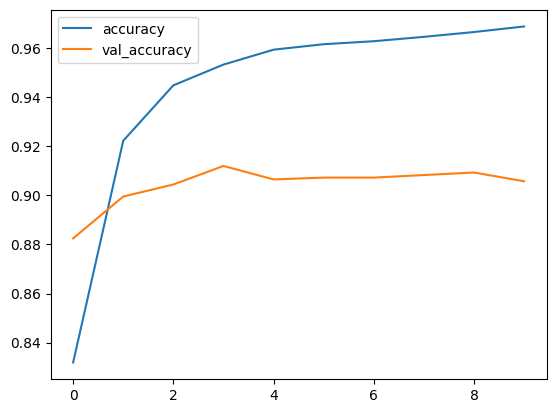

In [192]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

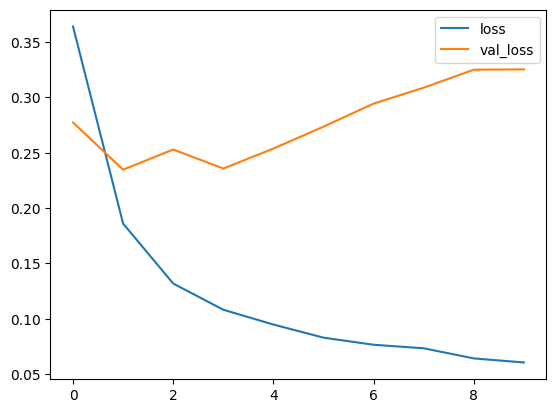

In [193]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [194]:
# model.save('sentiment_lstm.h5')

In [198]:
# predict on some random text
text = 'now I like him because he is a good person'
text = preprocess(text)
text = text.split()
text = tokenizer.texts_to_sequences([text])
text = pad_sequences(text, maxlen=max_len, padding='post')
model.predict(text)

1/1 [==============================] - 0s 30ms/step


array([[0.96539813]], dtype=float32)